# Data Visualisation

This notebook contains visualisations of futures data and macroeconomic indicators, to help us identify possible trends and patterns that could aid us in our preprocessing step.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import utils

In [2]:
path = 'tickerData/'
FUTURES_LIST = utils.futuresList
FUTURES_COLUMNS = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'OI', 'P', 'R', 'RINFO']

MACROIND_LIST = (
    'USA_ADP, USA_EARN,\
    USA_HRS, USA_BOT, USA_BC, USA_BI, USA_CU, USA_CF, USA_CHJC, USA_CFNAI,\
    USA_CP, USA_CCR, USA_CPI, USA_CCPI, USA_CINF, USA_DFMI, USA_DUR,\
    USA_DURET, USA_EXPX, USA_EXVOL, USA_FRET, USA_FBI, USA_GBVL, USA_GPAY,\
    USA_HI, USA_IMPX, USA_IMVOL, USA_IP, USA_IPMOM, USA_CPIC, USA_CPICM,\
    USA_JBO, USA_LFPR, USA_LEI, USA_MPAY, USA_MP, USA_NAHB, USA_NLTTF,\
    USA_NFIB, USA_NFP, USA_NMPMI, USA_NPP, USA_EMPST, USA_PHS, USA_PFED,\
    USA_PP, USA_PPIC, USA_RSM, USA_RSY, USA_RSEA, USA_RFMI, USA_TVS, USA_UNR,\
    USA_WINV'
).replace(' ', '').split(',')
MACROIND_COLUMNS = ['DATE', 'VALUE']

In [3]:
def plot_graphs(data_list, data_columns, column, path='', start_date=None, end_date=None):
    count = 0
    nrows = round(len(data_list)/6)
    ncols = 6
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 60))
    # plt.rcParams.update({'font.size': 24})
    fig.tight_layout(pad=4.0)
    
    for row in range(nrows):
        for col in range(ncols):
            future_data = pd.read_csv(f'{path+data_list[count]}.txt')
            future_data.columns = data_columns
            
            # datetime column
            future_data['DATETIME'] = future_data['DATE'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
            
            # filter date range
            if start_date:
                future_data = future_data.loc[future_data['DATETIME'] >= start_date]
            if end_date:
                future_data = future_data.loc[future_data['DATETIME'] <= end_date]

            try:
                ax[row, col].plot(future_data['DATETIME'], future_data[column])
            except:
                print('Column Key Not Found!')
            ax[row, col].set_title(data_list[count], fontsize=28)
            ax[row, col].set_ylabel(column, fontsize=20)
            ax[row, col].set_xlabel('DATE', fontsize=20)
            ax[row, col].get_xaxis().set_ticks([])
            ax[row, col].get_yaxis().set_ticks([])
            plt.grid(color='w')
            
            count += 1
            
            if count == len(data_list):
                break
         
    plt.show()

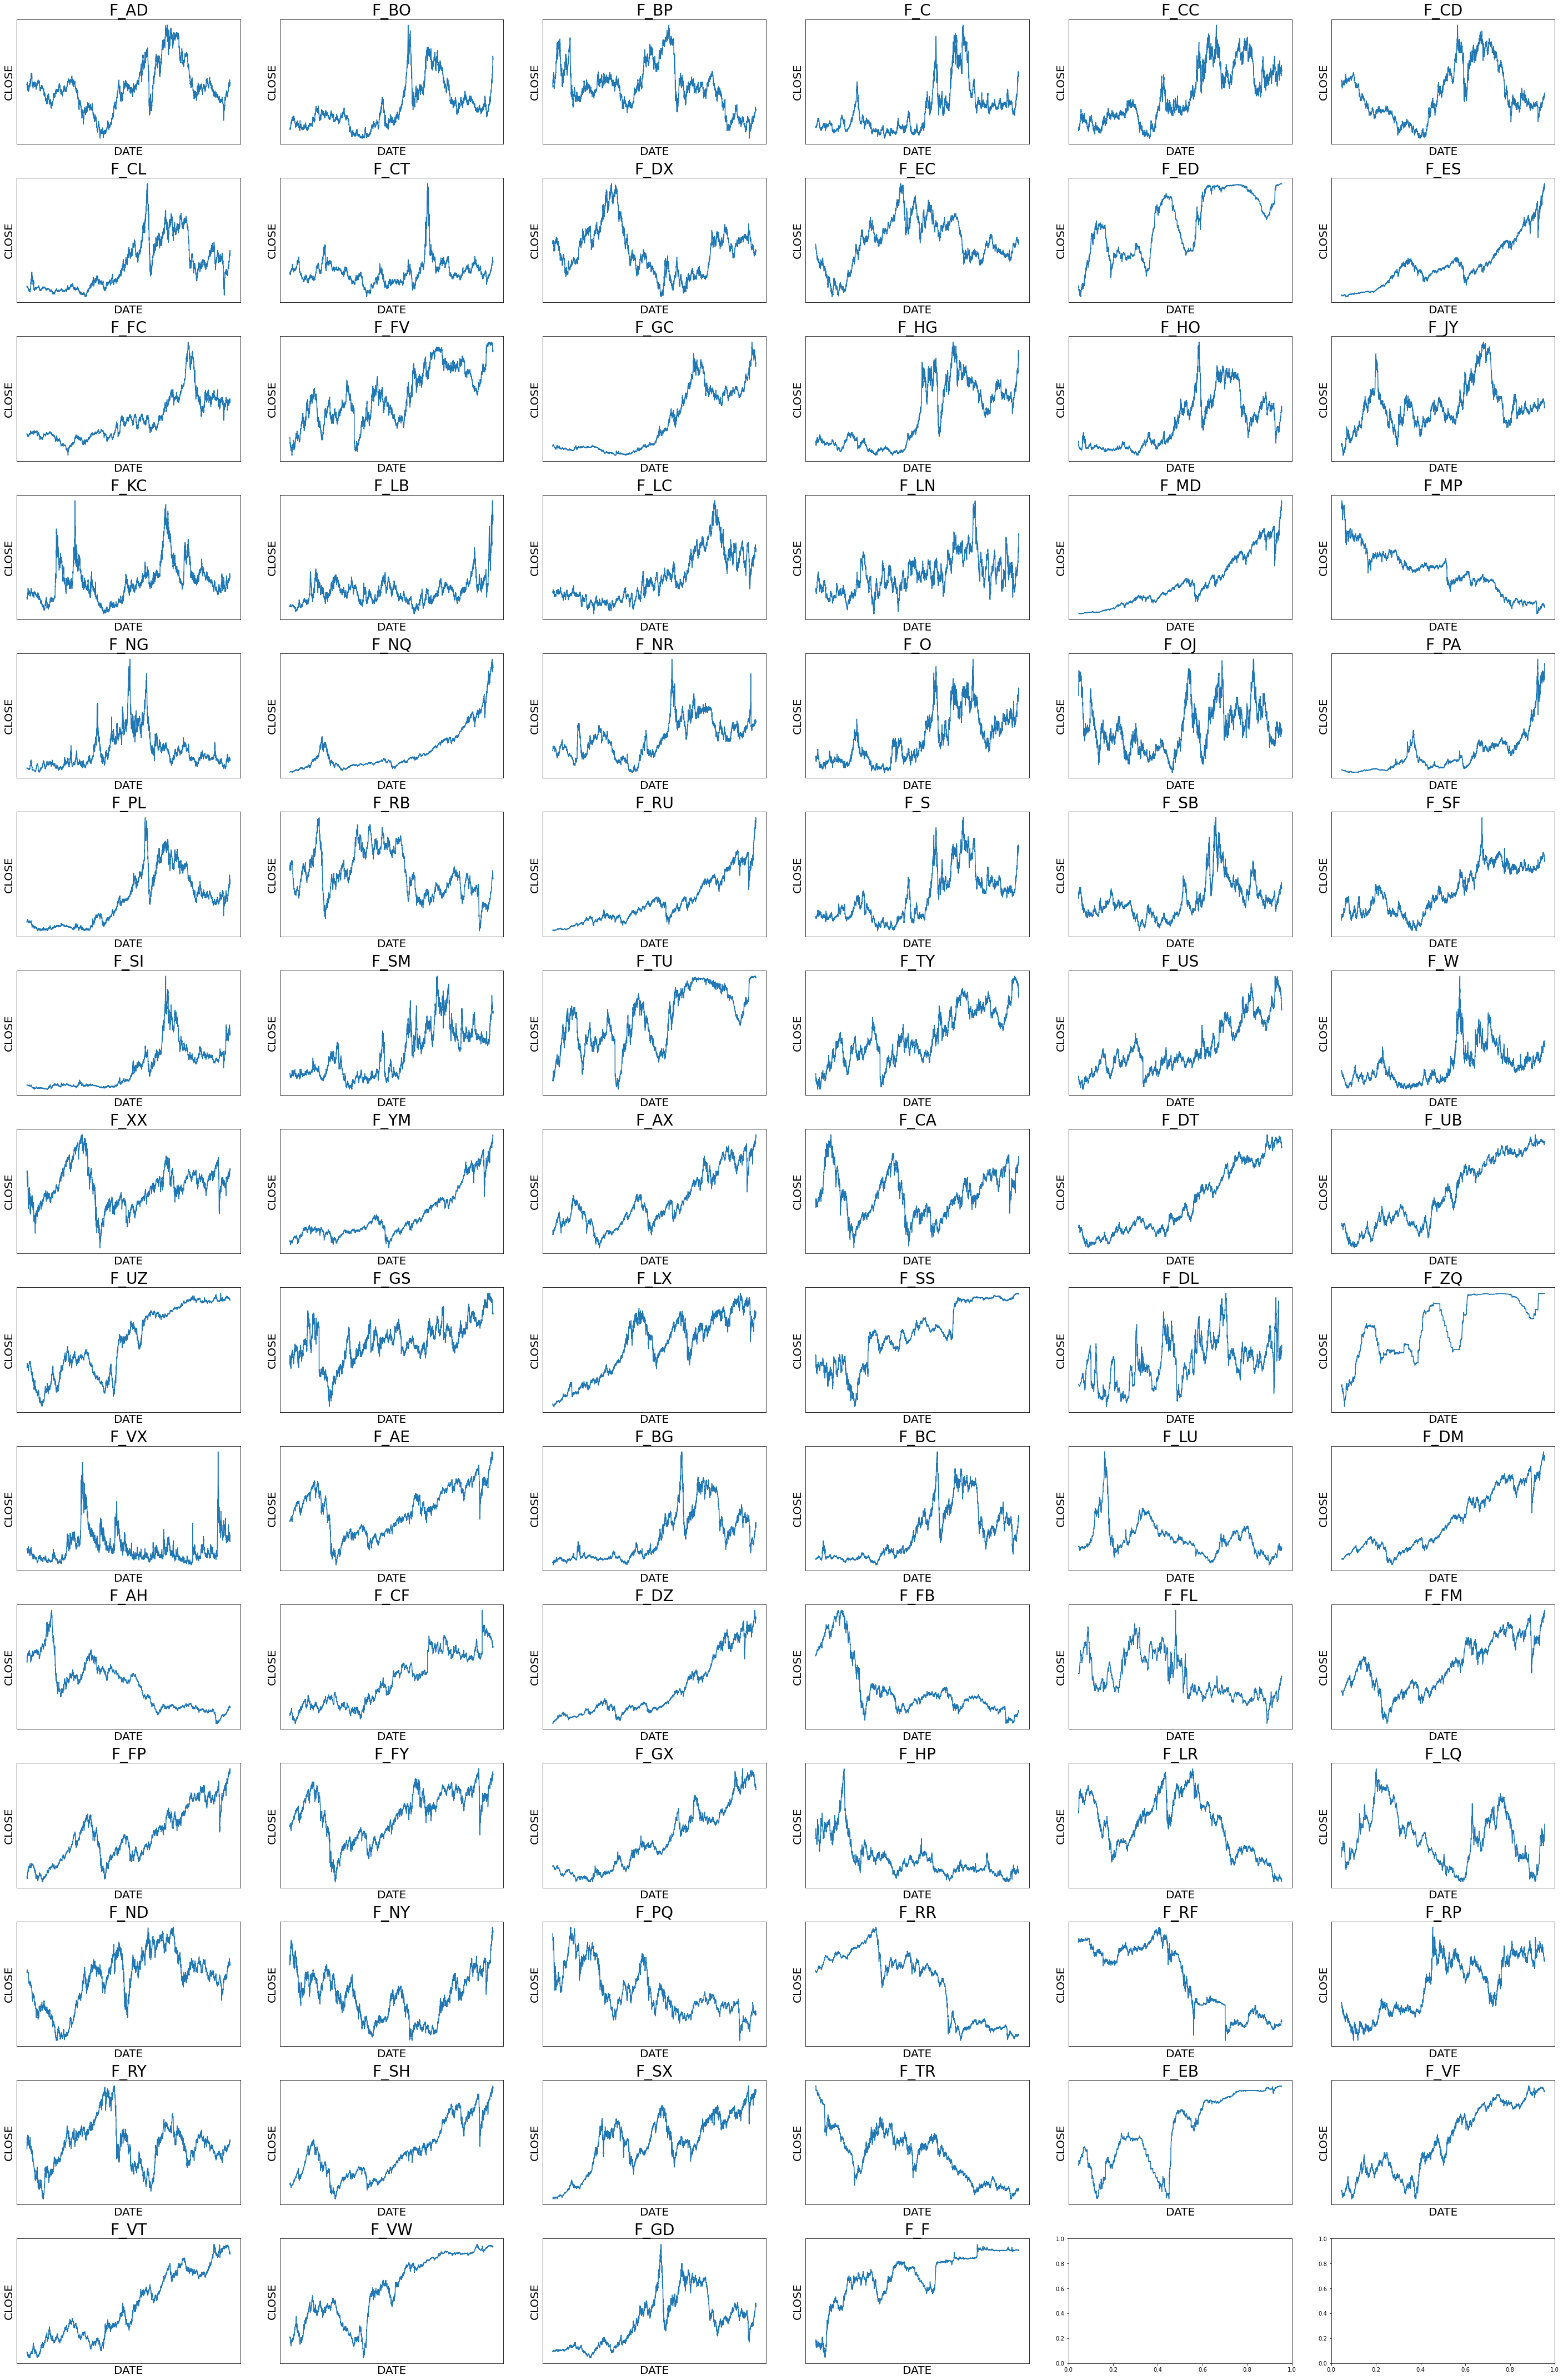

In [4]:
plot_graphs(FUTURES_LIST, FUTURES_COLUMNS, 'CLOSE', path)

In [ ]:
start_date = datetime(2015, 1, 1)

plot_graphs(FUTURES_LIST, FUTURES_COLUMNS, 'VOL', path, start_date)

In [ ]:
plot_graphs(MACROIND_LIST, MACROIND_COLUMNS, 'VALUE', path)

# Determining Exponential Trend

In [12]:
start_date = datetime(2010, 1, 1)

future_corr = {}
for future in utils.futuresList:
    future_close = utils.prepare_data(future)[start_date:]["CLOSE"]
    future_index = [0.01*i for i in range(len(future_close))]
    future_index_exp = np.exp(future_index)
    exp_corr = np.corrcoef(future_close, future_index_exp)[1][0]
    linear_corr = np.corrcoef(future_close, future_index)[1][0]
    future_corr[future] = [linear_corr, exp_corr]

exp_corr_df = pd.DataFrame([{"future": future, "linear_corr": linear_corr, "exp_corr": exp_corr} 
                            for future, (linear_corr, exp_corr) in future_corr.items()])
exp_corr_df.to_csv("future_corr.csv", index=False)

In [17]:
exp_corr_df[abs(exp_corr_df.linear_corr) < abs(exp_corr_df.exp_corr)]

,future,linear_corr,exp_corr
12,F_FC,0.054296,-0.118725
13,F_FV,-0.076921,0.410089
14,F_GC,0.140383,0.513610
19,F_LB,0.664804,0.765558
20,F_LC,-0.047752,-0.115048
35,F_SF,-0.092041,0.215738
39,F_TY,0.310150,0.461542
51,F_SS,0.513188,0.568323
52,F_DL,-0.054320,0.056070
54,F_VX,-0.040534,0.326796
